In [37]:
#BINARY CLASSIFICATION PROBLEM
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [38]:
dataset=pd.read_csv('Churn_Modelling.csv')

In [39]:
dataset

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [40]:
#Dividing into dependent and independent features
X=dataset.iloc[:,3:13]
y=dataset.iloc[:,13]

In [41]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [42]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [43]:
#this was done because neural networks cant understand string so we convert it into numbers.So we convert categorical variables into numerical values using one-hot encoding via pd.get_dummies() 
#When you use all three columns (Germany, Spain, France), they are linearly dependent, meaning one column can be calculated from the others.This causes multicollinearity, which can confuse the model
gender=pd.get_dummies(X['Gender'],drop_first=True)
geography=pd.get_dummies(X['Geography'],drop_first=True)

In [44]:
gender.astype(int)


,Male
0,0
1,0
2,0
3,0
4,0
...,...
9995,1
9996,1
9997,0
9998,1


In [45]:
geography.astype(int)

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1
...,...,...
9995,0,0
9996,0,0
9997,0,0
9998,1,0


In [50]:
X=X.drop(['Geography','Gender'],axis=1)

#In pandas, the axis parameter tells which axis you want the operation to apply to:
#axis=0 → operate on rows (drop rows)
#axis=1 → operate on columns (drop columns)

In [51]:
X=pd.concat([X,geography.astype(int),gender.astype(int)],axis=1)

In [52]:
#Splitting the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [53]:
#standardizing the features
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
X_train=scalar.fit_transform(X_train)
X_test=scalar.transform(X_test)

In [64]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

model = Sequential([
    Dense(11, activation='relu'),
    Dense(7, activation='relu'),
    Dense(6, activation='relu'),
    Dense(1, activation='sigmoid') 
])


In [65]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [86]:
result=model.fit(X_train, y_train, epochs=5, validation_split=0.33,batch_size=10)


Epoch 1/5
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8750 - loss: 0.3074 - val_accuracy: 0.8550 - val_loss: 0.3594
Epoch 2/5
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8660 - loss: 0.3172 - val_accuracy: 0.8519 - val_loss: 0.3572
Epoch 3/5
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8713 - loss: 0.3087 - val_accuracy: 0.8546 - val_loss: 0.3616
Epoch 4/5
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8738 - loss: 0.3051 - val_accuracy: 0.8519 - val_loss: 0.3569
Epoch 5/5
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8647 - loss: 0.3178 - val_accuracy: 0.8554 - val_loss: 0.3556


In [87]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc}")


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8561 - loss: 0.3281
Test accuracy: 0.8565000295639038


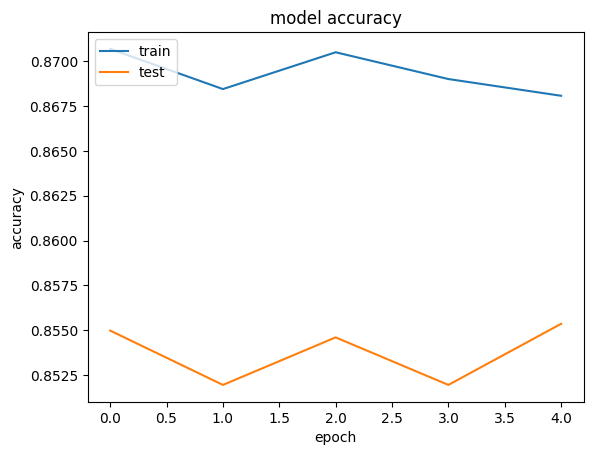

In [88]:
plt.plot(result.history['accuracy'])
plt.plot(result.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [89]:
# Training accuracy (final epoch)
history = model.fit(X_train, y_train, epochs=5, validation_split=0.1)
train_accuracy = history.history['accuracy'][-1]
val_accuracy = history.history['val_accuracy'][-1]

# Test accuracy
test_loss, test_accuracy = model.evaluate(X_test, y_test)

# Print results
print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


Epoch 1/5
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8670 - loss: 0.3245 - val_accuracy: 0.8662 - val_loss: 0.3259
Epoch 2/5
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8640 - loss: 0.3218 - val_accuracy: 0.8650 - val_loss: 0.3259
Epoch 3/5
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8645 - loss: 0.3184 - val_accuracy: 0.8687 - val_loss: 0.3246
Epoch 4/5
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8699 - loss: 0.3122 - val_accuracy: 0.8700 - val_loss: 0.3245
Epoch 5/5
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8744 - loss: 0.3117 - val_accuracy: 0.8687 - val_loss: 0.3246
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8622 - loss: 0.3294
Train Accuracy: 0.8651
Validation Accuracy: 0.8687
Test Accuracy: 0.8605


In [93]:
# Predict probabilities
predictions = model.predict(X_test)

# Convert probabilities to class labels (0 or 1)
predictions = (predictions >= 0.5)


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [94]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,predictions)

In [95]:
cm

array([[1517,   78],
       [ 201,  204]])

In [96]:
from sklearn.metrics import accuracy_score
score=accuracy_score(predictions,y_test)

In [97]:
score

0.8605